In [1]:

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')


import pylab as plt
import seaborn as sns


%matplotlib inline

In [2]:
sharks_ori=pd.read_csv('data/attacks.csv', encoding= "ISO-8859-1")

In [3]:
sharks=sharks_ori
sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


**1. Exploración de los datos**

In [4]:
dim_original= sharks.shape

In [5]:
sharks.columns=sharks.columns.str.strip()

In [6]:
sharks.columns=sharks.columns.str.lower()

In [7]:
dim_original

(25723, 24)

In [8]:
sharks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex                     5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal (y/n)             5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3464 non-null 

DATOS ESTADISTICOS

In [9]:
sharks.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case number,8702,6287,0,2400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,6302,5433,1957,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,6300.0,NaN,NaN,NaN,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
type,6298,8,Unprovoked,4595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,6252,212,USA,2229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area,5847,825,Florida,1037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,5762,4108,"New Smyrna Beach, Volusia County",163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
activity,5758,1532,Surfing,971,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,6092,5230,male,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,5737,6,M,5094,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DATOS NUMÉRICOS

In [10]:
num_sharks = sharks.select_dtypes(exclude='object')

num_sharks.head()

,year,original order
0,2018.0,6303.0
1,2018.0,6302.0
2,2018.0,6301.0
3,2018.0,6300.0
4,2018.0,6299.0


DATOS CATEGÓRICOS

In [11]:
cat_sharks = sharks.select_dtypes(exclude=['int64', 'float64'])

cat_sharks.head()

,case number,date,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,unnamed: 22,unnamed: 23
0,2018.06.25,25-Jun-2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,NaN,NaN
1,2018.06.18,18-Jun-2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,NaN,NaN
2,2018.06.09,09-Jun-2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,NaN,NaN
3,2018.06.08,08-Jun-2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,NaN,NaN
4,2018.06.04,04-Jun-2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,NaN,NaN


In [12]:
def check_nan(df: pd.DataFrame) -> None:
    
    nan_cols = df.isna().mean()  * 100  

    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    
    plt.figure(figsize=(10, 6))  

    sns.heatmap(df.isna(), 
                yticklabels=False,
                cmap='viridis',
                cbar=False
               )

    plt.show();

'N nan cols: 24'

case number               66.170353
date                      75.500525
year                      75.508300
type                      75.516075
country                   75.694903
area                      77.269370
location                  77.599813
activity                  77.615364
name                      76.316915
sex                       77.697003
age                       86.506240
injury                    75.609377
fatal (y/n)               77.595926
time                      88.539439
species                   86.533453
investigator or source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
case number.1             75.500525
case number.2             75.500525
original order            75.473312
unnamed: 22               99.996112
unnamed: 23               99.992225
dtype: float64

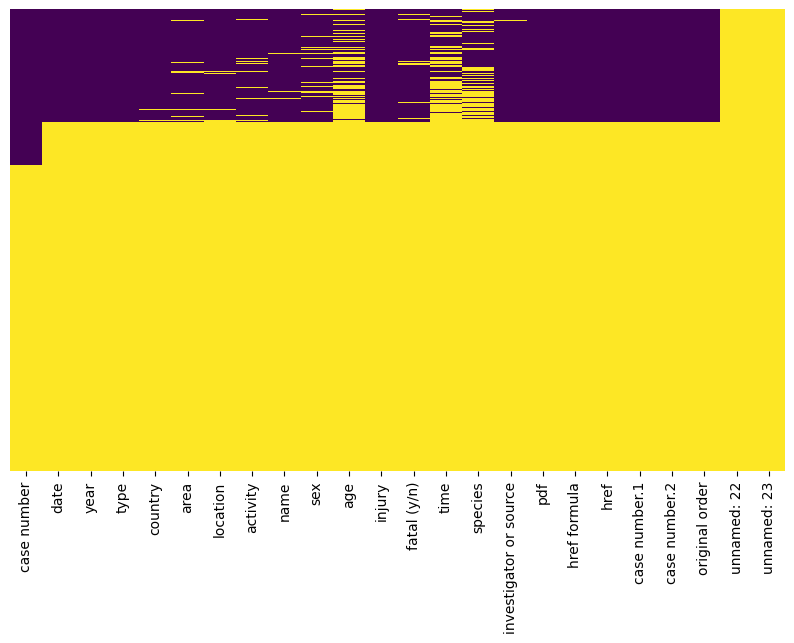

In [13]:
check_nan(sharks)

**LIMPIEZA DE NULOS Y DUPLICADOS**

In [14]:
nan_cols = sharks.isna().sum()

nan_cols[nan_cols>0]

case number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex                       19986
age                       22252
injury                    19449
fatal (y/n)               19960
time                      22775
species                   22259
investigator or source    19438
pdf                       19421
href formula              19422
href                      19421
case number.1             19421
case number.2             19421
original order            19414
unnamed: 22               25722
unnamed: 23               25721
dtype: int64

In [15]:
sharks = sharks.dropna(how='all') #Con este método vamos a eliminar todas las filas que sean completamente nulas.

In [16]:
sharks.shape, dim_original #podemos ver que hemos eliminado una gran cantidad de nulos

((8703, 24), (25723, 24))

In [17]:
sharks.duplicated().any() 

True

In [18]:
sharks=sharks.drop_duplicates()

In [19]:
sharks.shape

(6311, 24)

In [20]:
sharks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case number             6310 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex                     5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal (y/n)             5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3464 non-null  

Como para la hipotesis solo vamos a tener en cuenta los valores desde 1900 hacia delante, puesto que es lo más significativo, eliminaremos aquellos datos que salgan de dicho ranago.

In [21]:
sharks = sharks.drop(sharks[(sharks.year < 1900)].index)

In [22]:
sharks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5573 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case number             5572 non-null   object 
 1   date                    5564 non-null   object 
 2   year                    5562 non-null   float64
 3   type                    5561 non-null   object 
 4   country                 5540 non-null   object 
 5   area                    5251 non-null   object 
 6   location                5186 non-null   object 
 7   activity                5129 non-null   object 
 8   name                    5397 non-null   object 
 9   sex                     5063 non-null   object 
 10  age                     3380 non-null   object 
 11  injury                  5545 non-null   object 
 12  fatal (y/n)             5099 non-null   object 
 13  time                    2850 non-null   object 
 14  species                 3281 non-null  

A partir de ahora, iremos limpiando los nulos de cada columna.

In [23]:
sharks.info()
sharks.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5573 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case number             5572 non-null   object 
 1   date                    5564 non-null   object 
 2   year                    5562 non-null   float64
 3   type                    5561 non-null   object 
 4   country                 5540 non-null   object 
 5   area                    5251 non-null   object 
 6   location                5186 non-null   object 
 7   activity                5129 non-null   object 
 8   name                    5397 non-null   object 
 9   sex                     5063 non-null   object 
 10  age                     3380 non-null   object 
 11  injury                  5545 non-null   object 
 12  fatal (y/n)             5099 non-null   object 
 13  time                    2850 non-null   object 
 14  species                 3281 non-null  

case number                  1
date                         9
year                        11
type                        12
country                     33
area                       322
location                   387
activity                   444
name                       176
sex                        510
age                       2193
injury                      28
fatal (y/n)                474
time                      2723
species                   2292
investigator or source      24
pdf                          9
href formula                10
href                         9
case number.1                9
case number.2                9
original order               2
unnamed: 22               5572
unnamed: 23               5572
dtype: int64

En el caso de la columna case number, como se trata del numero de casos vamos a convertirla en numeros de casos desde 1 hasta el final de las filas.

In [24]:
sharks["case number"] = pd.Series(range(1, len(sharks) + 1))

En las siguientes columnas, vamos a sustituir los numeros nulos por unknown, puesto que no tenemos forma de averiguar el dato, o simplemente la columna carece de imprtancia para lo que será nuestro objetivo.

In [25]:
sharks.name.fillna('unknown', inplace=True) #en el caso del nombre de la victima
sharks.age.fillna('unknown', inplace=True)
sharks.sex.fillna('unknown', inplace=True)
sharks.species.fillna('unknown', inplace=True)
sharks['investigator or source'].fillna('unknown', inplace=True) 
sharks.pdf.fillna('unknown', inplace=True)
sharks['href formula'].fillna('unknown', inplace=True)            
sharks.href.fillna('unknown', inplace=True)                    
sharks['case number.1'].fillna('unknown', inplace=True)           
sharks['case number.2'].fillna('unknown', inplace=True)             
sharks['original order'].fillna('unknown', inplace=True)           
sharks['unnamed: 22'].fillna('unknown', inplace=True)              
sharks['unnamed: 23'].fillna('unknown', inplace=True) 
sharks['time'].fillna('unknown', inplace=True) 
sharks['activity'].fillna('unknown', inplace=True) 

In [26]:
sharks.isnull().sum()

case number                10
date                        9
year                       11
type                       12
country                    33
area                      322
location                  387
activity                    0
name                        0
sex                         0
age                         0
injury                     28
fatal (y/n)               474
time                        0
species                     0
investigator or source      0
pdf                         0
href formula                0
href                        0
case number.1               0
case number.2               0
original order              0
unnamed: 22                 0
unnamed: 23                 0
dtype: int64

Como estas tres columnas van a ser claves en la investigacion, y estas relacionadas, vamos a ver si en alguna de las columnas hay informacion relevante para las que tengan el valor nulo en esa fila.


In [27]:
sharks[['country', 'area', 'location']].head()

,country,area,location
0,USA,California,"Oceanside, San Diego County"
1,USA,Georgia,"St. Simon Island, Glynn County"
2,USA,Hawaii,"Habush, Oahu"
3,AUSTRALIA,New South Wales,Arrawarra Headland
4,MEXICO,Colima,La Ticla


In [28]:
sharks[sharks['area'].notna() & sharks['location'].notna() & (sharks['country'].isna())].head()

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
3387,3388.0,02-Aug-1970,1970.0,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,unknown,unknown,unknown,"Sharks scavenged on bodies, but no record of t...",NaN,Afternoon,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970",1970.08.02-Christina-ferryboat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.08.02,1970.08.02,2916.0,unknown,unknown
4266,4267.0,1956,1956.0,Sea Disaster,NaN,Between Comores & Madagascar,Geyser Bank,Shipwreck,"Captain Eric Hunt, the cook & a French passenger",M,unknown,FATAL,Y,unknown,unknown,dinofish.com,1956.00.00.g-Capt-Hunt.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1956.00.00.g,1956.00.00.g,2037.0,unknown,unknown
4498,4499.0,Dec-1949,1949.0,Sea Disaster,NaN,Caribbean Sea,Between Cuba & Costa Rica,"Sea Disaster, sinking of the motorship Wingate","Albert Battles, James Dean & 4 crew",M,unknown,Fatal or drowning or scavenging,Y,unknown,Shark involvement not confirmed,"Canberra Times, 1/6/1950",1949.12.00.b-Wingate.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1949.12.00.b,1949.12.00.b,1805.0,unknown,unknown
5020,5021.0,Reported 27-Apr-1931,1931.0,Unprovoked,NaN,French Southern Territories,Île Saint-Paul,"Fishing, boat capsized",Quillezic,M,unknown,FATAL,Y,unknown,unknown,"Los Angeles Times, 4/27/1931",1931.04.27.R-Quillezic.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1931.04.27.R,1931.04.27.R,1283.0,unknown,unknown


Observamos que los valores nulos de country, resulta ser porq no queda claro el lugar exacto, y además solos on 4 valores, por lo que no será relevante en nuestra investigación.

Procedemos entonces a sustituir dichos valores nulos, por unknown en las tres columnas, ya que no hay forma de saber el sitio exacto.

In [29]:
sharks['country'].fillna('unknown', inplace=True) 
sharks['area'].fillna('unknown', inplace=True) 
sharks['location'].fillna('unknown', inplace=True) 

In [30]:
sharks.isnull().sum()

case number                10
date                        9
year                       11
type                       12
country                     0
area                        0
location                    0
activity                    0
name                        0
sex                         0
age                         0
injury                     28
fatal (y/n)               474
time                        0
species                     0
investigator or source      0
pdf                         0
href formula                0
href                        0
case number.1               0
case number.2               0
original order              0
unnamed: 22                 0
unnamed: 23                 0
dtype: int64

Después de esto, comprobaremos que los valores restantes de country, son homgeneos. 

In [31]:

pd.unique(sharks['country'])



array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'unknown', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 

In [32]:
sharks["country"] = sharks["country"].str.upper()

In [33]:
sharks["country"] = sharks["country"].replace({"ST HELENA, British overseas territory": "UK", "UNITED KINGDOM": "UK", 'DIEGO GARCIA': 'UNKNOWN', 'UNITED ARAB EMIRATES (UAE)': 'UNITED ARAB EMIRATES', 'ENGLAND': 'UK'})

In [34]:
sharks.country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'UK', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'UNKNOWN', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, BRITISH OVERSEAS TERRITORY', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED ARAB EMIRATES',
       'PHILIPPINES', 'INDONESIA', 'CHINA', 'COLUMBIA', 'CAPE VERDE',
       'FIJI', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA',
       'MOZAMBIQUE', 'PUERTO RICO', 'ITALY', 'ATLANTIC OCEAN', 'GREECE',
       'ST. MARTIN', 'FRANCE', 'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO',
       'KIRIBATI', 'ISRAEL', 'TAIWAN', 'JAMAICA',
       'PALESTINIAN TERRITORIES', 'GUAM', 'SEYCHELLES', 'BELIZE',
       'NIGERIA', 'TONGA', 'SCOTLAND', 'CANADA', 'CROATIA',
       'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA', 'RUSSIA',
       'TURKS & CAICOS', 'AZORES', 'SOUTH KOREA', 'MALTA', 'VIETNAM',
  

Continuamos con las demas columnas.



In [35]:
sharks.isnull().sum()

case number                10
date                        9
year                       11
type                       12
country                     0
area                        0
location                    0
activity                    0
name                        0
sex                         0
age                         0
injury                     28
fatal (y/n)               474
time                        0
species                     0
investigator or source      0
pdf                         0
href formula                0
href                        0
case number.1               0
case number.2               0
original order              0
unnamed: 22                 0
unnamed: 23                 0
dtype: int64

In [36]:
pd.unique(sharks['type'])
sharks['type'].value_counts()


Unprovoked      4045
Provoked         539
Invalid          477
Sea Disaster     186
Boating          181
Boat             130
Questionable       2
Boatomg            1
Name: type, dtype: int64

En este caso, vamos a catalogar los tipos, como unprovoked, provoked, o inavlido, puesto que observando los datos, se catalogan los 'fishing' como provoked en la columna de activity, y en el caso de boat y boating, sucede lo mismo, se caracterizan con fishing. Por otro lado, Sea Disaster será unprovoked, puesto que es un desatre natural. 

In [37]:
def limpiar_type(x):
    
    if x == "Unprovoked":
        return 'Unprovoked'
    elif x == "Provoked":
        return 'Provoked'
    elif x == "Sea Disaster":
        return 'Unprovoked' 
    elif x == 'Boat':
        return 'Provoked'
    elif x== 'Boating':
        return 'Provoked'
  
    return 'Unknown'

In [38]:
sharks['type']=sharks.type.apply(limpiar_type)

In [39]:
pd.unique(sharks['type'])
sharks['type'].value_counts()

Unprovoked    4231
Provoked       850
Unknown        492
Name: type, dtype: int64

Las siguientes columnas, injury y fatal (y/n), estan bastante relacionadas, por lo que intentaremos rellenar algunos datos de fatal coon injury.

In [40]:
sharks[sharks['injury'].isna() & (sharks['fatal (y/n)'].notna())]

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
1270,1271.0,20-Apr-2008,2008.0,Unprovoked,AUSTRALIA,New South Wales,Crescent Head,unknown,Jamie Adlington,M,unknown,NaN,UNKNOWN,unknown,"Tiger shark, 2.3m","T. Peake, GSAF",2008.04.20.a-Adlington.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.04.20.a,2008.04.20.a,5033.0,unknown,unknown
2250,2251.0,07-Jun-1997,1997.0,Unprovoked,BRAZIL,Rio de Janeiro,"Copacabana, Rio de Janeiro",Bathing,José Luiz Lipiani,M,unknown,NaN,UNKNOWN,unknown,unknown,"Globo, 6/9/1997",1997.06.07-NV-Lipiani.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1997.06.07,1997.06.07,4053.0,unknown,unknown
2267,2268.0,29-Dec-1996,1996.0,Unprovoked,AUSTRALIA,Queensland,Coolum Beach,Surfing,Blair Hall,M,18,NaN,UNKNOWN,18h00,unknown,"The Advertiser, 12/30/1996, p.3",1996.12.29-BlairHall.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1996.12.29,1996.12.29,4036.0,unknown,unknown
2648,2649.0,1990,1990.0,Unprovoked,USA,Florida,"Pensacola, Escambia County",Surfing,male,M,17,NaN,UNKNOWN,unknown,unknown,unknown,1990.00.00-NV-Pensacola.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1990.00.00,1990.00.00,3655.0,unknown,unknown
3038,3039.0,Mar-1981,1981.0,Unprovoked,BRAZIL,Rio de Janeiro,Cabo Frio,Diving,unknown,unknown,unknown,NaN,UNKNOWN,unknown,White shark,"Globo,",1981.03.00-Brazil.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1981.03.00,1981.03.00,3265.0,unknown,unknown
3298,3299.0,27-Aug-1973,1973.0,Unprovoked,AUSTRALIA,Queensland,Palm Cove Beach,unknown,G. Cole,unknown,21,NaN,UNKNOWN,unknown,unknown,"J. Green, p.36",1973.08.27-Cole.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1973.08.27,1973.08.27,3005.0,unknown,unknown
3434,3435.0,22-May-1969,1969.0,Unprovoked,DOMINICAN REPUBLIC,unknown,unknown,Surfing,"Douglas Kuchn, Jr.",M,18,NaN,UNKNOWN,16h00,unknown,H.D.Baldridge (1994) SAF Case #1607,1969.05.22-NV-Kuchn.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1969.05.22,1969.05.22,2869.0,unknown,unknown
3712,3713.0,01-Jan-1964,1964.0,Unprovoked,AUSTRALIA,Western Australia,Metro coast,unknown,Edwards,unknown,unknown,NaN,UNKNOWN,unknown,unknown,"T. Peake, GSAF",1964.01.01.b-NV-Edwards.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1964.01.01.b,1964.01.01.b,2591.0,unknown,unknown
3838,3839.0,02-Feb-1962,1962.0,Provoked,NEW ZEALAND,North Island,South of New Plymouth,Fishing,"17' fishing launch, occupants: A. Burkitt & C....",unknown,unknown,NaN,UNKNOWN,unknown,unknown,SAF Case #1125,1962.02.02-NV-Burkitt-Brooke-launch.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1962.02.02,1962.02.02,2465.0,unknown,unknown
3841,3842.0,26-Jan-1962,1962.0,Unprovoked,MOZAMBIQUE,Gaza,Praia Sepulveda,unknown,Domingos Zefanias Cumbe,M,16,NaN,UNKNOWN,unknown,unknown,D. Davies,1962.01.26-Cumbe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1962.01.26,1962.01.26,2462.0,unknown,unknown


Como observamos, en este caso ambas columnas, son nulas, vamos a sustituir esos nulos por unknown mas adelante.

In [41]:
sharks[sharks['injury'].notna() & (sharks['fatal (y/n)'].isna())].shape

(459, 24)

Como vemos hay 459 filas donde coincide esta condición, es decir, que donde tengamos un nulo en fatal, tenemos datos en injury , por tanto vamos a intentar extraer información por si podemos rellenar esos valores nulos de la columna fatal.

Para poder trabajar mejor con la columna injury, y solament tiene 28 datos nulos, lo cual no es significante, vamos a transformalos en unknown.



In [42]:
sharks['injury'].fillna('unknown', inplace=True) 

Antes de nada, vamos a pasar los datos de fatal, a True y False.

In [43]:
pd.unique(sharks['fatal (y/n)'])
sharks['fatal (y/n)'].value_counts()

N          4007
Y          1027
UNKNOWN      55
 N            7
M             1
2017          1
N             1
Name: fatal (y/n), dtype: int64

In [44]:
def limpiar_fatal(x):
    if x == 'N':
        return 'False'
    elif x == ' N':
        return 'False'
    elif x == 'N ':
        return 'False'
    elif x== 'Y':
        return 'True'

    return 'UNKNOWN'


In [45]:
sharks['fatal (y/n)']= sharks['fatal (y/n)']=sharks['fatal (y/n)'].apply(limpiar_fatal)

In [46]:
pd.unique(sharks['fatal (y/n)'])


array(['False', 'True', 'UNKNOWN'], dtype=object)

Después de transformar la columna, en true, false y unknown, vamos a observar donde coinciden los nulos y los fatal de la columna injury.

In [47]:
sharks[sharks.injury.str.contains('FATAL') & (sharks['fatal (y/n)']=='UNKNOWN')].head()

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
76,77.0,01-Oct-2017,2017.0,Unknown,SOUTH AFRICA,Western Cape Province,Dyer Island,Scuba Diving,Bradley Fick,M,31,FATAL,UNKNOWN,unknown,Death may have been due to drowning,"All Africa, 10/11/2017",2017.10.01-Fick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.01,2017.10.01,6227.0,unknown,unknown
84,85.0,15-Sep-2017,2017.0,Unknown,SOUTH AFRICA,Western Cape Province,Hawston,Scuba Diving,Wayon Love,M,25,"FATAL, but death was probably due to drowning",UNKNOWN,Afternoon,unknown,"Ground Up, 9/20/2017",2017.09.15.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.b,2017.09.15.b,6219.0,unknown,unknown
437,438.0,29-Mar-2015,2015.0,Unknown,ITALY,Sardinia,unknown,Diving,Eugenio Masala,M,43,"FATAL, but shark involvement prior to death un...",UNKNOWN,unknown,Shark involvement not cofirmed,"A. de Maddalena, GSAF",2015.03.29-Masala.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.03.29,2015.03.29,5866.0,unknown,unknown
874,875.0,28-Aug-2011,2011.0,Unknown,AUSTRALIA,Queensland,Fantome Island,Swimming,Rooster,M,48,FATAL,UNKNOWN,19h30,Shark involvement prior to death not confirmed,"Courier Pigeon, 8/30/2011",2011.08.28-Roosteer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2011.08.28.b,2011.08.28.b,5429.0,unknown,unknown
1495,1496.0,22-Mar-2006,2006.0,Unknown,SOUTH AFRICA,Eastern Cape Province,Port Alfred,Swimming,Lorenzo Kroutz,M,17,"FATAL, but shark involvement prior to death un...",UNKNOWN,unknown,Shark involvement prior to death was not confi...,"Cape Times, 3/24/2006, p.3",2006.03.22-Koutz.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.03.22,2006.03.22,4808.0,unknown,unknown


A continuacion sustituimos con true o false, en funcion de si aparece o no la palabra fatal.

In [48]:
sharks['fatal (y/n)'] = np.where(sharks['injury'].str.contains('FATAL'), 'True', 'False')


In [49]:
pd.unique(sharks['fatal (y/n)'])

array(['False', 'True'], dtype=object)

In [50]:
pd.unique(sharks['fatal (y/n)'])
sharks['fatal (y/n)'].value_counts()

False    4598
True      975
Name: fatal (y/n), dtype: int64

Vamos a ver que numeros nulos nos quedan

In [51]:
sharks.isnull().sum()

case number               10
date                       9
year                      11
type                       0
country                    0
area                       0
location                   0
activity                   0
name                       0
sex                        0
age                        0
injury                     0
fatal (y/n)                0
time                       0
species                    0
investigator or source     0
pdf                        0
href formula               0
href                       0
case number.1              0
case number.2              0
original order             0
unnamed: 22                0
unnamed: 23                0
dtype: int64

In [52]:
 sharks[(sharks.date.isnull()) & (sharks.year.isnull()) & (sharks['case number'].isnull())]

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
6302,NaN,NaN,NaN,Unknown,UNKNOWN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,False,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,6304.0,unknown,unknown
6303,NaN,NaN,NaN,Unknown,UNKNOWN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,False,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,6305.0,unknown,unknown
6304,NaN,NaN,NaN,Unknown,UNKNOWN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,False,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,6306.0,unknown,unknown
6305,NaN,NaN,NaN,Unknown,UNKNOWN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,False,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,6307.0,unknown,unknown
6306,NaN,NaN,NaN,Unknown,UNKNOWN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,False,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,6308.0,unknown,unknown
6307,NaN,NaN,NaN,Unknown,UNKNOWN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,False,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,6309.0,unknown,unknown
6308,NaN,NaN,NaN,Unknown,UNKNOWN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,False,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,6310.0,unknown,unknown
6309,NaN,NaN,NaN,Unknown,UNKNOWN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,False,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
25722,NaN,NaN,NaN,Unknown,UNKNOWN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,False,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown


Como podemos observar, practiamente las filas enteras tienen numero nulo, por lo que vamos a eliminarlas, no son repsetentativa en ningua de las columnas necesarias


In [53]:
sharks = sharks.drop([6302, 6303, 6304, 6305, 6306, 6307, 6308, 6309, 25722])

In [54]:
sharks.isnull().sum()

case number               1
date                      0
year                      2
type                      0
country                   0
area                      0
location                  0
activity                  0
name                      0
sex                       0
age                       0
injury                    0
fatal (y/n)               0
time                      0
species                   0
investigator or source    0
pdf                       0
href formula              0
href                      0
case number.1             0
case number.2             0
original order            0
unnamed: 22               0
unnamed: 23               0
dtype: int64

In [55]:
sharks[(sharks['year'].isnull())] # En el caso de year lo vamos a sutituir por 0, puesto que nos interesan algunos de los otros datos ofrecidos en la fila, excepto la ultima que la eliminaremos.

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
187,188.0,Reported 08-Jan-2017,NaN,Unknown,AUSTRALIA,Queensland,unknown,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",False,unknown,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0,unknown,unknown
6079,NaN,Reported 19-Aug-1836,NaN,Unprovoked,UK,Cumberland,Whitehaven,Swimming,a boy,M,unknown,FATAL,True,unknown,unknown,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0,unknown,unknown


In [56]:
sharks['year'] = sharks['year'].fillna(0)

In [57]:
sharks.isnull().sum()

case number               1
date                      0
year                      0
type                      0
country                   0
area                      0
location                  0
activity                  0
name                      0
sex                       0
age                       0
injury                    0
fatal (y/n)               0
time                      0
species                   0
investigator or source    0
pdf                       0
href formula              0
href                      0
case number.1             0
case number.2             0
original order            0
unnamed: 22               0
unnamed: 23               0
dtype: int64

In [58]:
sharks[(sharks['case number'].isnull())] #En este caso, conservamos la fila y le pondremos el ultimo numero de la fila.

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
6079,NaN,Reported 19-Aug-1836,0.0,Unprovoked,UK,Cumberland,Whitehaven,Swimming,a boy,M,unknown,FATAL,True,unknown,unknown,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0,unknown,unknown


In [59]:
sharks['case number'].unique


<bound method Series.unique of 0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
         ...  
5560    5561.0
5561    5562.0
5562    5563.0
5563    5564.0
6079       NaN
Name: case number, Length: 5564, dtype: float64>

In [60]:
sharks['case number'] = sharks['case number'].fillna(5565.0)

In [61]:
sharks.isnull().sum()

case number               0
date                      0
year                      0
type                      0
country                   0
area                      0
location                  0
activity                  0
name                      0
sex                       0
age                       0
injury                    0
fatal (y/n)               0
time                      0
species                   0
investigator or source    0
pdf                       0
href formula              0
href                      0
case number.1             0
case number.2             0
original order            0
unnamed: 22               0
unnamed: 23               0
dtype: int64

In [62]:
sharks=sharks.rename(columns={'fatal (y/n)':'fatal'})

In [63]:
sharks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5564 entries, 0 to 6079
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case number             5564 non-null   float64
 1   date                    5564 non-null   object 
 2   year                    5564 non-null   float64
 3   type                    5564 non-null   object 
 4   country                 5564 non-null   object 
 5   area                    5564 non-null   object 
 6   location                5564 non-null   object 
 7   activity                5564 non-null   object 
 8   name                    5564 non-null   object 
 9   sex                     5564 non-null   object 
 10  age                     5564 non-null   object 
 11  injury                  5564 non-null   object 
 12  fatal                   5564 non-null   object 
 13  time                    5564 non-null   object 
 14  species                 5564 non-null   

Ya tenemos todas nuestras columnas sin numeros nulos, por tanto ahora vamos a trabajar sobre las columnas que nos interesa en nuestro objetivo.

**OBJETIVO DEL ANÁLISIS**

1. ¿Dónde hay mas ataques de tiburones y cual es la explicación?
2. ¿Que tipo de ataque suele ser? ¿Y que parte del cuerpo suele ser la más perjudicada?

Para empezar, vamos a realizar un nuevo dataframes, con las variables inlcuidas en el objetivo y las que podrian ser interesantes para la investigación. 

In [74]:
sharks_2 = sharks[['case number', 'year', 'type', 'country', 'area', 'location', 'activity', 'injury', 'fatal',]].head()

In [75]:
sharks_2

,case number,year,type,country,area,location,activity,injury,fatal
0,1.0,2018.0,Provoked,USA,California,"Oceanside, San Diego County",Paddling,"No injury to occupant, outrigger canoe and pad...",False
1,2.0,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Minor injury to left thigh,False
2,3.0,2018.0,Unknown,USA,Hawaii,"Habush, Oahu",Surfing,Injury to left lower leg from surfboard skeg,False
3,4.0,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,Minor injury to lower leg,False
4,5.0,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,False


Como la mayoria son datos de tipo objeto, hemos sacado la moda para saber cual es el sitio con mas ataques de tiburones.

In [66]:
columns_to_check = ['country', 'area','location']
sharks_2_clean = sharks_2[columns_to_check].dropna()
sharks_2_clean = sharks_2_clean[sharks_2_clean != "unknown"]
sharks_2_clean.mode()

,country,area,location
0,USA,Florida,"New Smyrna Beach, Volusia County"


En este caso, el sitio con más ataques de tiburones es USA, Florida la playa New Smyrna Beach. Tras realizar una investigaicon en articulos sobre ataques a los tiburones, he descubierto que precisamente este lugar esta denominado como 'La capital de los tiburones' ya que contiene el mayor numero de ataques de tiburones anuales, y ademas tambien uno de los lugares con mayor cantidad de tiburones.

In [67]:
top3_country = sharks_2['country'].value_counts().head(3)

top3_country

USA             2083
AUSTRALIA       1181
SOUTH AFRICA     549
Name: country, dtype: int64

Text(0.5, 1.0, 'Top 3 países')

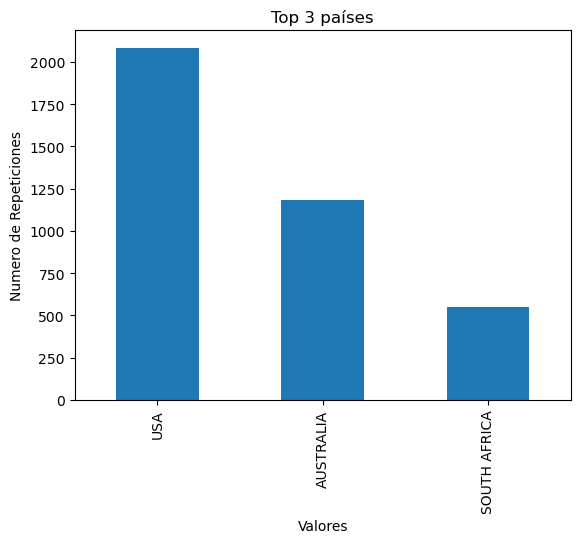

In [68]:
import matplotlib.pyplot as plt

top3_country.plot.bar()
plt.xlabel('Valores')
plt.ylabel('Numero de Repeticiones')
plt.title('Top 3 países')

Arriba podemos ver ls tres paises con más ataques de tiburones.

In [69]:
columns_to_check2 = ['activity', 'type','fatal']
sharks_2_clean2 = sharks_2[columns_to_check2].dropna()
sharks_2_clean2  = sharks_2_clean2[sharks_2_clean2 != "unknown"]
sharks_2_clean2.mode()

,activity,type,fatal
0,Surfing,Unprovoked,False


Hemos sacado la moda de los datos, para ver como suelen ser la mayoria de los ataques. En este caso,no provocados, lo que va directamente relacionado con la actividad "Surfing", y normalmente no suelen acabar en muerte.


Por tanto, vamos a averiguar que suelen atacar los tiburones,

In [70]:
import re
arms = ["(.*)?arms(.*)?", "(.*)?hand(.*)?" ]
leg = ["(.*)leg(.*)?", "(.*)?foot(.*)?" ]
fatal = ["(.*)?atal(.*)?", "(.*)?ody(.*)?" ]
ribs = ["(.*)?ribs(.*)?"]
noinjury = ["(.*)?o injur(.*)?"]


In [71]:
def tipo (x) :
    Arms = "ARMS"
    Leg = 'LEGS'
    Fatal = 'FATAL'
    Ribs = 'RIBS'
    Noinjury = 'NO INJURY'
    x = x.lower()
    if type(x) != str:
        return 'Unknown'
    else:
        for a in Arms:
            if re.search (a,x):
                x = Arms
                return x
        for l in leg:
            if re.search (l,x):
                x = Leg
                return x
        for i in fatal:
            if re.search (i,x):
                x = Fatal
                return x 
        for r in ribs:
            if re.search (r,x):
                x = Ribs
                return x
        for n in noinjury:
            if re.search (n,x):
                x = Noinjury
                return x
        return 'Unknown'

In [72]:
sharks_2['injury2'] = sharks_2['injury'].apply(tipo)        

sharks_2.head()

,case number,year,type,country,area,location,activity,injury,fatal,injury2
0,1.0,2018.0,Provoked,USA,California,"Oceanside, San Diego County",Paddling,"No injury to occupant, outrigger canoe and pad...",False,NO INJURY
1,2.0,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Minor injury to left thigh,False,Unknown
2,3.0,2018.0,Unknown,USA,Hawaii,"Habush, Oahu",Surfing,Injury to left lower leg from surfboard skeg,False,LEGS
3,4.0,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,Minor injury to lower leg,False,LEGS
4,5.0,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,False,LEGS


In [73]:
columns_to_check = ['injury2']
sharks_2_clean = sharks_2[columns_to_check].dropna()
sharks_2_clean  = sharks_2_clean[sharks_2_clean != "Unknown"]
sharks_2_clean.mode()

,injury2
0,LEGS


En este analsis vemos que la mayoría de las veces los ataques han estado relacionadas con las piernas de las victimas.

**Conclusiones**

Como conclusion de todo el analisis, el principal punto de ataques se localiza en USA , Florida, New Smyrna Beach, conocido como la capital de los tiburones, por la gran cantidad de tiburones que se concentra en dicha playa, y además tambien porque existen muchas personas practicando deportes actuaticos como el surf. 
Esto nos lleva directamente a la segunda parte del analisis, donde hemos podido observar que la actividad acuatica que mas se realiza es el surf, además en esta tabla tambien podemos obserar que la mayoria de ataques son no provocados y además no suelen ser fatales.

Esta ultima conclusion nos lleva a la ultima hipotesis: que parte del cuerpo de la victima suele ser la mas atacada, la tabla nos muestra que son las piernas.